# ASSIGNMENT - 2

**22nd-June-2022**

## Q3 : RBF Neural Network

In [1]:
#Importing Libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


class RBF:
    """
    Radial basis function class innitializes the parameters for every instance based
    on the centres method 
    """
    def __init__(self, x, y, method, sigma):
        self.x = x
        self.y = y
        self.method = method #1 for x_train centres, 2 for 150 centres and 3 for Kmeans centre method
        self.sigma = sigma
        self.v = None #centres : initialized None due to different number of centres in different methods
        self.w = None #weight : updated with Gaussian kernel function based on number of centres passed in gaussian_matrix function

    def distance(self, x1, x2):
        """
        calculates distance by squaring the input arrays(vectors)
        Input : array
        Return : array
        """
        return np.dot((x1-x2).T, x1-x2)

    def gaussian_matrix(self):
        """
        Initilaizes the centres based on method and calculates the gaussian matrix and weights for desired input
        Input : class instance
        Return : None
        Updates w variable initially set to None
        """
        if self.method == 1: #same centres as x
            self.v = self.x #x as centres
        elif self.method == 2: #150 random centres
            index = np.random.randint(self.x.shape[0], size=150) #random selection of 150 indexes
            self.v = self.x[index, :] #subsetting only 150 indexes
        elif self.method == 3: #KMeans centroids passed as centres
            kmeans = KMeans(n_clusters=150).fit(self.x) #150 centres by predefining 150 cluster points
            self.v = kmeans.cluster_centers_

        G = np.array([[(1 / np.exp(-self.distance(x, c)/(2*(self.sigma**2)))) for c in self.v] for x in self.x]) 
        # Gaussian kernel as the radial basis functions (g(ij))
        self.w = np.dot(np.dot(np.linalg.pinv(np.dot(G.T, G)), G.T), self.y) # w = G_inverse*D , here D is y or output
        # G_+ = inverse(G.T *G). G.T; W = G_+*D
        #using pseudo-inverse method(pinv) to calculate the weight matrix using gaussian kernel function

    def prediction(self, x):
        """
        Calculates , D = G.W
        Inputs : class instance, x (array) 
        Returns : predicted labels :yhat (array)
        """
        yhat = np.dot(np.array([[(1 / np.exp(-self.distance(x, c) / (2 * (self.sigma ** 2)))) for c in self.v] for x in x]), self.w)
        return yhat # predicted labels

    def mean_square_error(self, y, yhat):
        """
        Calculates mse as square(yhat - y) / total records in yhat
        Inputs : train_labels, predicted_labels
        Returns : mean square error (float)
        """
        total_records = y.shape[0]
        return np.dot((yhat-y).T, (yhat-y))[0][0] / total_records
    
    def accuracy(self, y, yhat):
        """
        Calculates accuracy using counter increment on every correctectly identified labels between true and predicted labels
        Inputs : class instance, true label (array), predicted label(array)
        Returns : accuracy (float)
        """
        correct = 0
        for i in range(0, len(y)): # for all labels in true_labels
            correct += 1 if (y[i] == yhat[i]) else 0
        return correct / len(y)

### Preparing data

In [2]:
data = np.array([[-2+0.2*i, -2+0.2*j] for i in range(21) for j in range(21)]) 
#data = (i, j) based on conditions given in assignment and in range(21) for 21*21 sample points 
label = np.array([[1] if x[0]**2+x[1]**2 <= 1 else [-1] for x in data])
#assigning lable based on square(x1) + square(x2) is less than or greater than one
index = np.random.permutation(data.shape[0])
data = data[index]
label = label[index]
split_index = int(441*0.8)
train_data = data[:split_index]
train_label = label[:split_index]
test_data = data[split_index:]
test_label = label[split_index:]

In [3]:
print(f'First 5 data points are : \n {data[:5]}')

First 5 data points are : 
 [[-1.6  0. ]
 [-0.6 -1. ]
 [ 1.2  1.2]
 [-1.4 -1.8]
 [-1.4  2. ]]


In [4]:
print(f'Total records in train and test are : \n {train_data.shape}, {test_data.shape} respectively')

Total records in train and test are : 
 (352, 2), (89, 2) respectively


Text(0, 0.5, 'y')

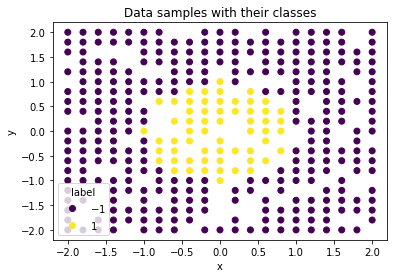

In [5]:
scatter=plt.scatter(train_data[:,0], train_data[:,1], c = train_label[:,0])
plt.title("Data samples with their classes")
plt.legend(*scatter.legend_elements(),loc= "best", title = "label")
plt.xlabel("x")
plt.ylabel("y")

Based on the label assignment condition, it is evident from the plot that when x1 and x2 both are close to zero are assigned label

### Method-1 : centres same as train_data

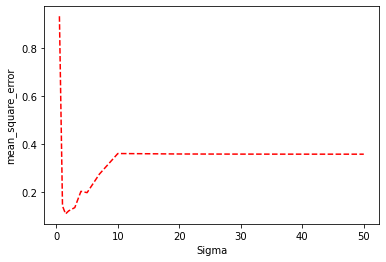

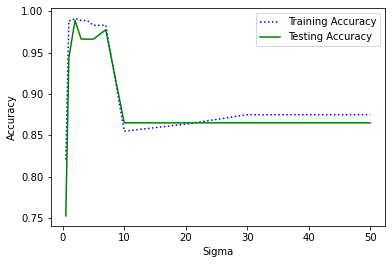

In [6]:
sigmas = [0.5, 1, 1.5, 2, 3, 4, 5, 7, 10, 20, 30, 40, 50]
mse_list = []
test_accuracy_list = []
train_accuracy_list = []
for sigma in sigmas:
    nn = RBF(x=train_data, y=train_label, method=1, sigma=sigma) #initialize object as class instance
    nn.gaussian_matrix() #update weights
    # prediction on training data
    yhat = nn.prediction(train_data)
    #mse for training data
    mse_list.append(nn.mean_square_error(train_label, yhat))
    # get label based on filter condition on y_predicted
    y_output = np.where(yhat < 0, -1, 1)
    train_accuracy_list.append(nn.accuracy(train_label, y_output))
    # prediction on testing data
    yhat = nn.prediction(test_data)
    # get label based on filter condition on y_predicted
    y_output = np.where(yhat < 0, -1, 1)
    test_accuracy_list.append(nn.accuracy(test_label, y_output))
plt.figure()
plt.plot(sigmas, mse_list, 'r--')
plt.xlabel('Sigma')
plt.ylabel('mean_square_error')
plt.show()
plt.figure()
plt.plot(sigmas, train_accuracy_list, 'b:')
plt.plot(sigmas, test_accuracy_list, 'g-')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

In [7]:
print(f' Mean square errors for all sigmas is : \n {mse_list}')

 Mean square errors for all sigmas is : 
 [0.9318207382045703, 0.14318364842872852, 0.1101180036568592, 0.12261040543041495, 0.136406620762509, 0.20398244738220636, 0.19858770242980145, 0.2755105600607072, 0.36111903155417774, 0.3592258649470056, 0.3586965961233104, 0.35851147897263946, 0.35842592011799357]


In [8]:
print(f'The least mean squared error observed is {min(mse_list)} and it corresponds to {sigmas[mse_list.index(min(mse_list))]} sigma' )
#min(mse_list), mse_list.index(min(mse_list)), sigmas.index(mse_list.index(min(mse_list)))

The least mean squared error observed is 0.1101180036568592 and it corresponds to 1.5 sigma


In [9]:
print(f'Training accuracy for all sigmas is : \n {train_accuracy_list}')

Training accuracy for all sigmas is : 
 [0.8210227272727273, 0.9886363636363636, 0.9886363636363636, 0.9914772727272727, 0.9886363636363636, 0.9886363636363636, 0.9829545454545454, 0.9829545454545454, 0.8551136363636364, 0.8636363636363636, 0.875, 0.875, 0.875]


In [10]:
print(f'The maximum training accuracy is {max(train_accuracy_list)} and it corresponds to {sigmas[(train_accuracy_list.index(max(train_accuracy_list)))]} sigma' )
#max(train_accuracy_list), train_accuracy_list.index(max(train_accuracy_list)), sigmas[(train_accuracy_list.index(max(train_accuracy_list)))]

The maximum training accuracy is 0.9914772727272727 and it corresponds to 2 sigma


In [11]:
print(f'Test accuracy for all sigmas is : \n {test_accuracy_list}')

Test accuracy for all sigmas is : 
 [0.7528089887640449, 0.9438202247191011, 0.9662921348314607, 0.9887640449438202, 0.9662921348314607, 0.9662921348314607, 0.9662921348314607, 0.9775280898876404, 0.8651685393258427, 0.8651685393258427, 0.8651685393258427, 0.8651685393258427, 0.8651685393258427]


In [12]:
print(f'The maximum training accuracy is {max(test_accuracy_list)} and it corresponds to {sigmas[(test_accuracy_list.index(max(test_accuracy_list)))]} sigma' )
#max(test_accuracy_list), test_accuracy_list.index(max(test_accuracy_list)), sigmas[test_accuracy_list.index(max(test_accuracy_list))]

The maximum training accuracy is 0.9887640449438202 and it corresponds to 2 sigma


> We observe that sigma 1.5 gave the least mse and highest training accuracy.
> This implies that larger sigmas may not be that helpful in generalizing the fit as test accuracy reaches maxima at 3 sigma and is considerably high for 1.5 sigma

### Method-2 : 150 random centres from train_data

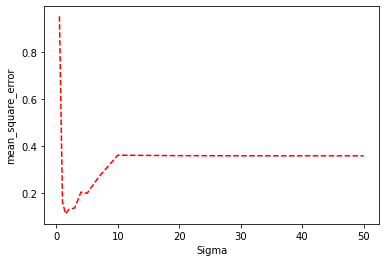

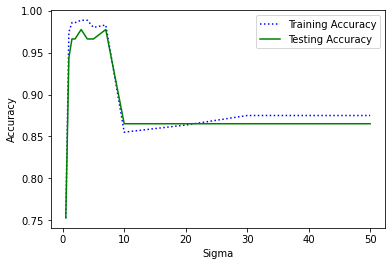

In [13]:
sigmas = [0.5, 1, 1.5, 2, 3, 4, 5, 7, 10, 20, 30, 40, 50]
mse_list = []
test_accuracy_list = []
train_accuracy_list = []
for sigma in sigmas:
    nn = RBF(x=train_data, y=train_label, method=2, sigma=sigma) #initialize object as class instance
    nn.gaussian_matrix() #update weights
    # prediction on training data
    yhat = nn.prediction(train_data)
    #mse for training data
    mse_list.append(nn.mean_square_error(train_label, yhat))
    # get label based on filter condition on y_predicted
    y_output = np.where(yhat < 0, -1, 1)
    train_accuracy_list.append(nn.accuracy(train_label, y_output))
    # prediction on testing data
    yhat = nn.prediction(test_data)
    # get label based on filter condition on y_predicted
    y_output = np.where(yhat < 0, -1, 1)
    test_accuracy_list.append(nn.accuracy(test_label, y_output))
plt.figure()
plt.plot(sigmas, mse_list, 'r--')
plt.xlabel('Sigma')
plt.ylabel('mean_square_error')
plt.show()
plt.figure()
plt.plot(sigmas, train_accuracy_list, 'b:')
plt.plot(sigmas, test_accuracy_list, 'g-')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

### Method-3 : 150 centrid points from KMeans as centres

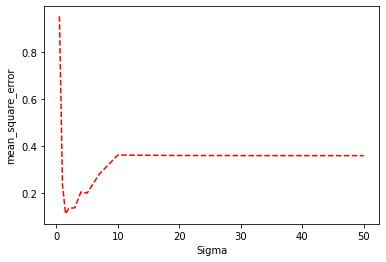

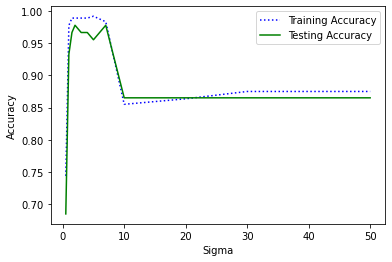

In [14]:
sigmas = [0.5, 1, 1.5, 2, 3, 4, 5, 7, 10, 20, 30, 40, 50]
mse_list = []
test_accuracy_list = []
train_accuracy_list = []
for sigma in sigmas:
    nn = RBF(x=train_data, y=train_label, method=2, sigma=sigma) #initialize object as class instance
    nn.gaussian_matrix() #update weights
    # prediction on training data
    yhat = nn.prediction(train_data)
    #mse for training data
    mse_list.append(nn.mean_square_error(train_label, yhat))
    # get label based on filter condition on y_predicted
    y_output = np.where(yhat < 0, -1, 1)
    train_accuracy_list.append(nn.accuracy(train_label, y_output))
    # prediction on testing data
    yhat = nn.prediction(test_data)
    # get label based on filter condition on y_predicted
    y_output = np.where(yhat < 0, -1, 1)
    test_accuracy_list.append(nn.accuracy(test_label, y_output))
plt.figure()
plt.plot(sigmas, mse_list, 'r--')
plt.xlabel('Sigma')
plt.ylabel('mean_square_error')
plt.show()
plt.figure()
plt.plot(sigmas, train_accuracy_list, 'b:')
plt.plot(sigmas, test_accuracy_list, 'g-')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

In [15]:
#For method 1 
nn = RBF(x=train_data, y=train_label, method=1, sigma=3)
nn.gaussian_matrix()
yhat = nn.prediction(train_data)
y_output = np.where(yhat < 0, -1, 1)
print(nn.accuracy(train_label, y_output))
yhat = nn.prediction(test_data)
y_output = np.where(yhat < 0, -1, 1)
print(nn.accuracy(test_label, y_output))

0.9886363636363636
0.9662921348314607


In [16]:
#For method 2 
nn = RBF(x=train_data, y=train_label, method=2, sigma=3)
nn.gaussian_matrix()
yhat = nn.prediction(train_data)
y_output = np.where(yhat < 0, -1, 1)
print(nn.accuracy(train_label, y_output))
yhat = nn.prediction(test_data)
y_output = np.where(yhat < 0, -1, 1)
print(nn.accuracy(test_label, y_output))

0.9886363636363636
0.9662921348314607


In [17]:
#For method 3 
nn = RBF(x=train_data, y=train_label, method=3, sigma=3)
nn.gaussian_matrix()
yhat = nn.prediction(train_data)
y_output = np.where(yhat < 0, -1, 1)
print(nn.accuracy(train_label, y_output))
yhat = nn.prediction(test_data)
y_output = np.where(yhat < 0, -1, 1)
print(nn.accuracy(test_label, y_output))

0.9886363636363636
0.9775280898876404


### Conclusion

1. We observed that when sigma is chosen beyond 10, mse is quite high and stable for all the three methods
2. Training and testing accuracy oscialltes between higer 90% accuracy mark below 10 but steeps down beyond 10 sigma
3. The above two observations highligts that suitable choice of sigma in this use case is around 3 and higher sigma tend to worsen the fit.
4. Out if the three centre methods used in this problem, centres with same centres as data performed well and reached higher accuracy faster compared to the two other method which also perform similarly on testing accuracy but choosing centres as Kmeans cluster gave better accuracy performance.

#### References

[1]. Retreived from URL : https://en.wikipedia.org/wiki/Radial_basis_function_network

[2]. Retreived from URL : https://towardsdatascience.com/radial-basis-function-neural-network-simplified-6f26e3d5e04d

[3]. Retreived from URL : https://github.com/paulwong16/